<a href="https://colab.research.google.com/github/Bansalnitika21/Nitikabansal21.github.io/blob/devil/waste1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d techsash/waste-classification-data

 99% 423M/427M [00:13<00:00, 29.4MB/s]
100% 427M/427M [00:13<00:00, 34.1MB/s]


In [8]:
!kaggle datasets init -p /content

Data package template written to: /content/dataset-metadata.json


In [11]:
!kaggle datasets create  --dir-mode zip -p /content

Starting upload for file .config.zip
100% 6.75k/6.75k [00:09<00:00, 761B/s]
Upload successful: .config.zip (7KB)
Starting upload for file waste-classification-data.zip
100% 427M/427M [00:19<00:00, 22.9MB/s]
Upload successful: waste-classification-data.zip (427MB)
Starting upload for file kaggle.json
100% 70.0/70.0 [00:06<00:00, 11.1B/s]
Upload successful: kaggle.json (70B)
Starting upload for file dataset.zip
100% 212M/212M [00:13<00:00, 17.1MB/s]
Upload successful: dataset.zip (212MB)
Starting upload for file DATASET.zip
100% 212M/212M [00:13<00:00, 16.5MB/s]
Upload successful: DATASET.zip (212MB)
Starting upload for file sample_data.zip
100% 6.74M/6.74M [00:07<00:00, 983kB/s]
Upload successful: sample_data.zip (7MB)
Dataset creation error: Path must be unique


In [12]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5515.jpg  
  i

In [13]:
os.listdir("dataset")

['DATASET']

In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
bs=64

In [17]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("dataset"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

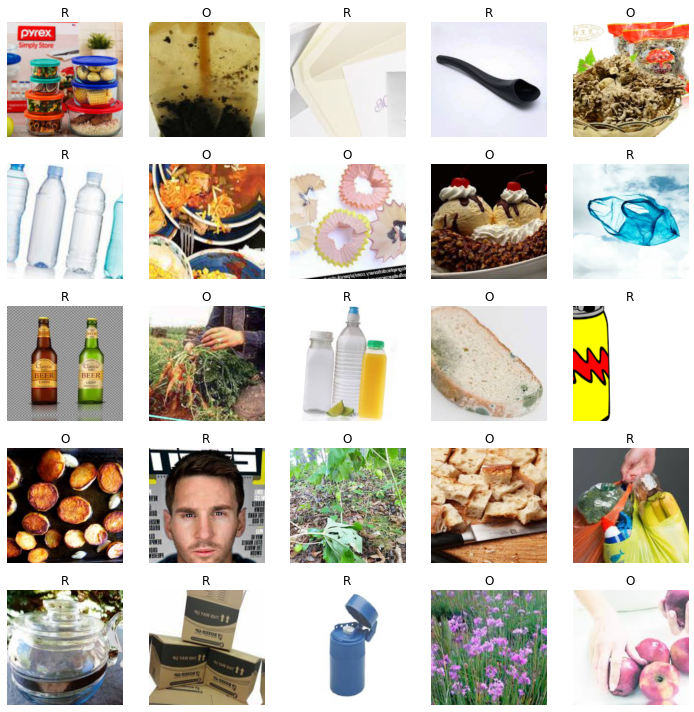

In [18]:
data.show_batch(rows=5, figsize=(10,10))